In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [3]:
df = pd.read_excel('tweetnft.xlsx')



In [4]:
df.head()

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763,Need Sick Character artâ“#art #artist #Artist...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community


In [6]:
df.tail()

,id,tweet_text,tweet_created_at,tweet_intent
127448,1278721,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z,NaN
127449,1278723,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,NaN
127450,1278724,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z,NaN
127451,1278725,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z,NaN
127452,1278729,@Shill_Ronin @UNLEASHED_NFT my proof https://t...,2022-08-08T03:31:58.000Z,NaN


In [7]:
df.describe()

,id
count,1.274530e+05
mean,1.297300e+06
std,6.301816e+04
min,1.212762e+06
25%,1.244749e+06
50%,1.276623e+06
75%,1.346851e+06
max,2.309537e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127453 entries, 0 to 127452
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                127453 non-null  int64 
 1   tweet_text        127453 non-null  object
 2   tweet_created_at  127453 non-null  object
 3   tweet_intent      96364 non-null   object
dtypes: int64(1), object(3)
memory usage: 2.4+ MB


In [9]:
df.columns

Index(['id', 'tweet_text', 'tweet_created_at', 'tweet_intent'], dtype='object')

In [10]:
data=df.drop(columns=['id','tweet_text','tweet_created_at','tweet_intent'])

In [11]:
df.columns

Index(['id', 'tweet_text', 'tweet_created_at', 'tweet_intent'], dtype='object')

In [12]:
null_columns=df.columns[df.isnull().any()]
null_columns

Index(['tweet_intent'], dtype='object')

In [13]:
df[null_columns].isnull().sum()

tweet_intent    31089
dtype: int64

In [14]:
print(df[df.isnull().any(axis=1)][null_columns].head())

      tweet_intent
96364          NaN
96365          NaN
96366          NaN
96367          NaN
96368          NaN


In [15]:
df.fillna

<bound method DataFrame.fillna of              id                                         tweet_text  \
0       1212762  @crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...   
1       1212763  Need Sick Character artâ“#art #artist #Artist...   
2       1212765  @The_Hulk_NFT @INagotchiNFT @Tesla @killabears...   
3       1212766  @CryptoBatzNFT @DarekBTW The first project in ...   
4       1212767  @sashadysonn The first project in crypto with ...   
...         ...                                                ...   
127448  1278721  @Jason My company Universe is solving this, an...   
127449  1278723          @BosoTokyo Many will get rekt in this NFT   
127450  1278724  @leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...   
127451  1278725             @1kz3ro @UNLEASHED_NFT I love this job   
127452  1278729  @Shill_Ronin @UNLEASHED_NFT my proof https://t...   

                tweet_created_at  tweet_intent  
0       2022-08-06T16:56:36.000Z     Community  
1       2022-08-06T16:56:36

In [16]:
df.dtypes

id                   int64
tweet_text          object
tweet_created_at    object
tweet_intent        object
dtype: object

In [17]:
df_imp_features=['id','tweet_text','tweet_created_at','tweet_intent']

In [18]:
df.id.value_counts()

1316861    1
1293789    1
1252809    1
1246666    1
1248715    1
          ..
1331807    1
1411684    1
1409637    1
1387120    1
1310720    1
Name: id, Length: 127453, dtype: int64

In [19]:
df.tweet_text.value_counts()

@Codex314159265 Feature it on @Globalnft07\nWe have a great community of nft artists and nft collectors                                                                                                                                                                                                                                  381
@botSattoNFT Feature it on @Globalnft07\nWe have a great community of nft artists and nft collectors                                                                                                                                                                                                                                     260
@Enthusiasm_NFT Done                                                                                                                                                                                                                                                                                                                     227
@

In [20]:
df.tweet_created_at.value_counts()

2022-08-11T10:57:24.000Z    24
2022-08-11T11:11:38.000Z    22
2022-08-11T11:00:37.000Z    21
2022-08-11T11:29:27.000Z    20
2022-08-11T11:42:38.000Z    20
                            ..
2022-08-10T03:23:43.000Z     1
2022-08-10T04:50:02.000Z     1
2022-08-10T07:47:07.000Z     1
2022-08-08T05:16:56.000Z     1
2022-08-11T23:41:20.000Z     1
Name: tweet_created_at, Length: 50394, dtype: int64

In [21]:
df.tweet_intent.value_counts()

Community         41510
Giveaway          21041
Appreciation      16451
Whitelist          8320
Presale            5107
Done               3049
pinksale            477
Interested          276
Launching Soon      133
Name: tweet_intent, dtype: int64

In [22]:
df['id'].is_unique

True

In [23]:
df.isna().any()

id                  False
tweet_text          False
tweet_created_at    False
tweet_intent         True
dtype: bool

In [24]:
df.isna().sum()

id                      0
tweet_text              0
tweet_created_at        0
tweet_intent        31089
dtype: int64

In [25]:
df.isna().any().sum()

1

In [26]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
127448    False
127449    False
127450    False
127451    False
127452    False
Length: 127453, dtype: bool

In [27]:
df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,id,tweet_text,tweet_created_at,tweet_intent
0,1212762,@crypto_brody @eCoLoGy1990 @MoonrunnersNFT @It...,2022-08-06T16:56:36.000Z,Community
1,1212763,Need Sick Character artâ“#art #artist #Artist...,2022-08-06T16:56:36.000Z,Giveaway
2,1212765,@The_Hulk_NFT @INagotchiNFT @Tesla @killabears...,2022-08-06T16:56:35.000Z,Appreciation
3,1212766,@CryptoBatzNFT @DarekBTW The first project in ...,2022-08-06T16:56:35.000Z,Community
4,1212767,@sashadysonn The first project in crypto with ...,2022-08-06T16:56:34.000Z,Community
...,...,...,...,...
127448,1278721,"@Jason My company Universe is solving this, an...",2022-08-08T03:32:01.000Z,NaN
127449,1278723,@BosoTokyo Many will get rekt in this NFT,2022-08-08T03:32:00.000Z,NaN
127450,1278724,@leeneedham81 @KibaInuWorld @HODL_OFFICIAL @Ko...,2022-08-08T03:32:00.000Z,NaN
127451,1278725,@1kz3ro @UNLEASHED_NFT I love this job,2022-08-08T03:31:59.000Z,NaN


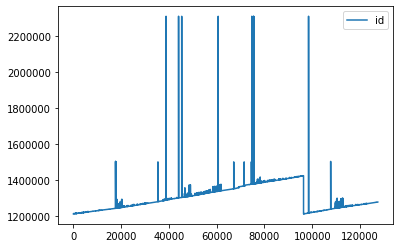

In [28]:
df.plot()

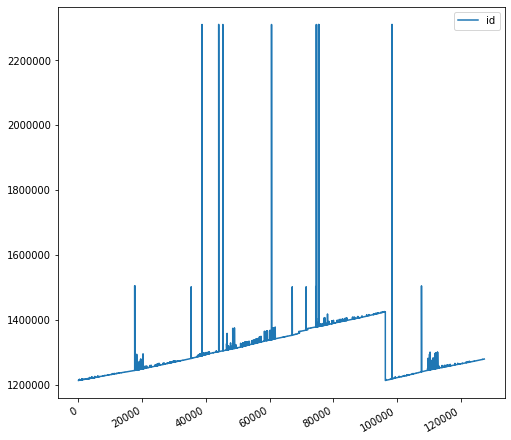

In [29]:
df.plot(subplots=True, figsize=(8, 8));

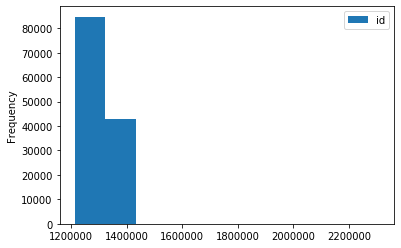

In [30]:
df.plot.hist()

In [36]:
data1 = df.head()

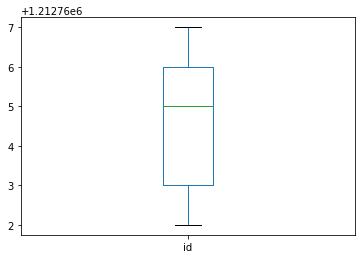

In [37]:
data1.plot.box()

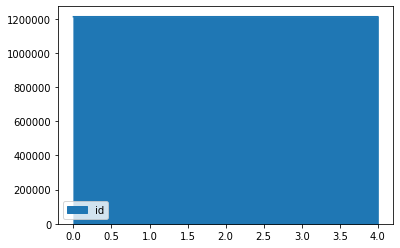

In [39]:
data1.plot.area()

In [42]:
pie = pd.Series(np.random.rand(5))

In [43]:
pie

0    0.295466
1    0.186190
2    0.587859
3    0.265038
4    0.032874
dtype: float64

In [46]:
df = pd.DataFrame(np.random.rand(6, 3),
                   columns=('col_1', 'col_2', 'col_3'))

In [47]:
df

,col_1,col_2,col_3
0,0.411547,0.806458,0.956347
1,0.603587,0.061122,0.740646
2,0.513166,0.378283,0.404429
3,0.349657,0.652238,0.028542
4,0.474946,0.344512,0.710499
5,0.870056,0.099221,0.641353
